In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
df.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [9]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [11]:
df = df.drop(['Unnamed: 0'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [14]:
df.fillna(' ', inplace=True)
features = df[['title','text']]
labels = df['label']

In [15]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [17]:
label_status = df['label'].value_counts()
transactions = label_status.index
quantatity = label_status.values
figure = px.pie(df,
               values=quantatity,
               names=transactions, hole=.60,
               title='Spam and Ham Status')
plt.show()

# Ctreate word clouds 

In [18]:

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    
fake_text = ' '.join(df[df['label'] == 0]['text'])
fake_text = ' '.join(df[df['label'] == 1]['text'])

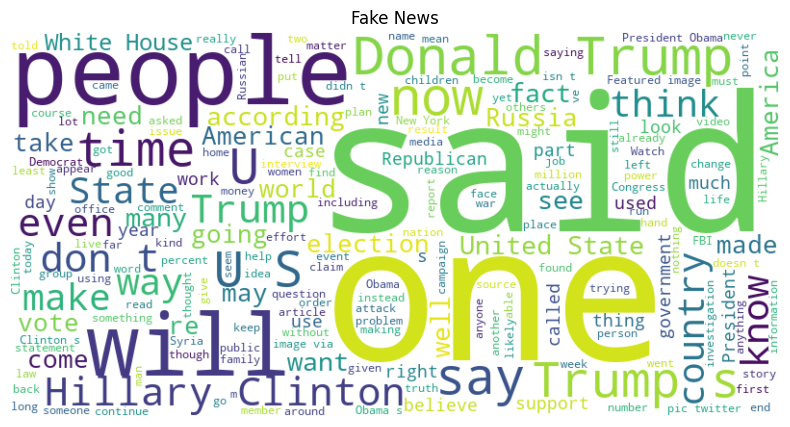

In [19]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

# Text preprocessing 

In [20]:
tex_column = 'text'
label_column = "label"

In [22]:
import nltk

nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to C:\Users\Ghost
[nltk_data]     Codm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def preprocessing_text(text):
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc)
    text = ([word for word in clean_words.split() if word.lower() not in stopword])
    return text

In [26]:
df[tex_column] = df[tex_column].apply(preprocessing_text)

In [28]:
df[tex_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

# Lemmatization

In [35]:
nltk.download('wordnet')

lemmatization = WordNetLemmatizer()

def lemmatization_text(text):
    lemmatized_text = ' '.join([lemmatization.lemmatize(word) for word in text])
    return lemmatized_text

df[tex_column] = df[tex_column].apply(lemmatization_text)


[nltk_data] Downloading package wordnet to C:\Users\Ghost
[nltk_data]     Codm\AppData\Roaming\nltk_data...


In [36]:
df[tex_column] 

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

In [37]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df[tex_column])
y = df[label_column]

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=42)

# Evaluate Naive Bayes Models

In [41]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
#     prob = model.predict_proba(xtest)[:, 1]
#     roc_auc = roc_auc_score(ytest, prob)
#     precision, recall, _ = precision_recall_curve(ytest, prob)
#     pr_auc = auc(recall, precision)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
#         'ROC AUC': roc_auc,  # Added this line
#         'PR AUC': pr_auc      # Added this line
    }


# Build Naive Bayes

In [42]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain,ytrain)

MultinomialNB()

In [43]:
MultinomialNB()

MultinomialNB()

In [44]:
from sklearn.metrics import precision_recall_curve, auc

In [45]:
nb_result = evaluate_model(mnb_model, xtest,ytest)

In [46]:
nb_result

{'Accuracy': 0.8765306593965159,
 'Confusion Matrix': array([[9711,  902],
        [1770, 9258]], dtype=int64)}

In [47]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[9711,  902],
       [1770, 9258]], dtype=int64)

<Axes: >

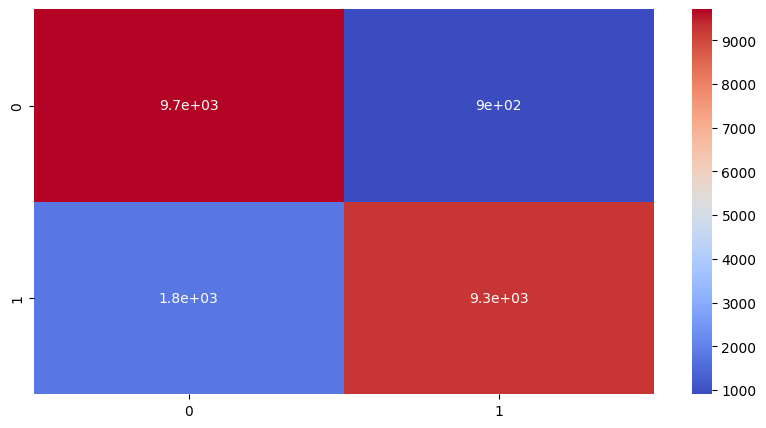

In [51]:
plt.figure(figsize=(10,5))
plt.xlabel('Predicted Data')
plt.ylabel('Acctual Data')
sns.heatmap(cm,annot=True,cmap="coolwarm")

In [54]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [55]:
BernoulliNB()

BernoulliNB()

In [56]:
bnb_result = evaluate_model(bnb_model, xtest, ytest)
bnb_result

{'Accuracy': 0.8547202070144633,
 'Confusion Matrix': array([[8573, 2040],
        [1104, 9924]], dtype=int64)}

In [58]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [59]:
LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

In [60]:
lr_result = evaluate_model(lr_model, xtest,ytest)
lr_result

{'Accuracy': 0.9512499422392681,
 'Confusion Matrix': array([[ 9975,   638],
        [  417, 10611]], dtype=int64)}

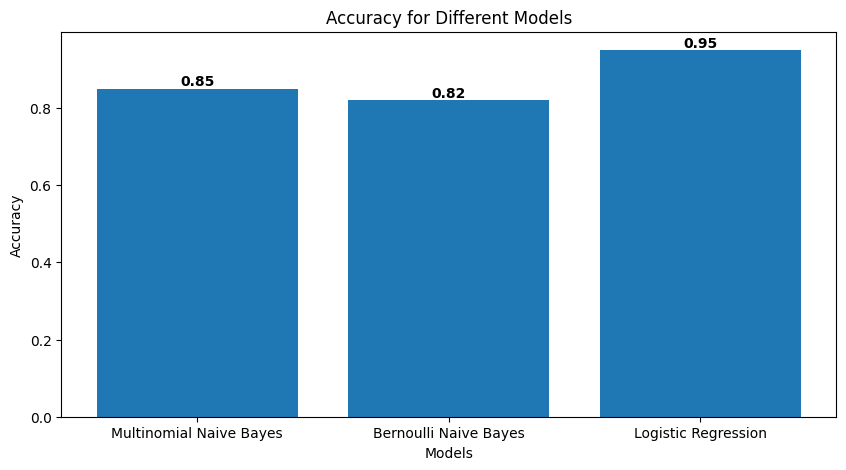

In [67]:
import matplotlib.pyplot as plt

def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10,5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

# Assuming you have results for different models
nb_result = {'Accuracy': 0.85}
bnb_result = {'Accuracy': 0.82}
lr_result = {'Accuracy': 0.95}

accuracy_values = [nb_result['Accuracy'], bnb_result['Accuracy'], lr_result['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']

plot_histogram(accuracy_values, model_names, 'Accuracy')


# Input Random Text and make prediction

In [68]:
models = [mnb_model, bnb_model, lr_model]

In [69]:
random_text = input()
preprocessrd_text =  preprocessing_text(random_text)
lemmatization_text = lemmatization_text(preprocessrd_text)
tex_vector = vectorizer.transform([lemmatization_text])

Israel formally declared war on Hamas on Sunday and began hammering Gaza with heavy bombardment and air strikes, pounding the militant group but also deepening the ongoing humanitarian crisis for civilians in the densely populated enclave.  As talk of a possible ground invasion intensifies, it is becoming clear that many in Israel are preparing for what could be a long war.  The group Muszkat-Barkan is helping to organize, Jerusalem Emergency Command, is formed of hundreds of volunteers from several civil society organizations, including her protest group, Safeguarding our Shared Home. Some are working to connect evacuees from the attacked communities with families who can house them. Others are organizing car sharing for reservists who need to get to their bases.  One big room is now a makeshift call center receiving requests for help, while the theater has been turned into a donations warehouse.  Muszkat-Barkan said most of the help is going to people who have been impacted by the at

In [70]:
preprocessrd_text

['Israel',
 'formally',
 'declared',
 'war',
 'Hamas',
 'Sunday',
 'began',
 'hammering',
 'Gaza',
 'heavy',
 'bombardment',
 'air',
 'strikes',
 'pounding',
 'militant',
 'group',
 'also',
 'deepening',
 'ongoing',
 'humanitarian',
 'crisis',
 'civilians',
 'densely',
 'populated',
 'enclave',
 'talk',
 'possible',
 'ground',
 'invasion',
 'intensifies',
 'becoming',
 'clear',
 'many',
 'Israel',
 'preparing',
 'could',
 'long',
 'war',
 'group',
 'MuszkatBarkan',
 'helping',
 'organize',
 'Jerusalem',
 'Emergency',
 'Command',
 'formed',
 'hundreds',
 'volunteers',
 'several',
 'civil',
 'society',
 'organizations',
 'including',
 'protest',
 'group',
 'Safeguarding',
 'Shared',
 'Home',
 'working',
 'connect',
 'evacuees',
 'attacked',
 'communities',
 'families',
 'house',
 'Others',
 'organizing',
 'car',
 'sharing',
 'reservists',
 'need',
 'get',
 'bases',
 'One',
 'big',
 'room',
 'makeshift',
 'call',
 'center',
 'receiving',
 'requests',
 'help',
 'theater',
 'turned',
 'dona

In [71]:
lemmatization_text

'Israel formally declared war Hamas Sunday began hammering Gaza heavy bombardment air strike pounding militant group also deepening ongoing humanitarian crisis civilian densely populated enclave talk possible ground invasion intensifies becoming clear many Israel preparing could long war group MuszkatBarkan helping organize Jerusalem Emergency Command formed hundred volunteer several civil society organization including protest group Safeguarding Shared Home working connect evacuee attacked community family house Others organizing car sharing reservist need get base One big room makeshift call center receiving request help theater turned donation warehouse MuszkatBarkan said help going people impacted attack family soldier Israel called 300000 reservist – one largest mobilization country’s history – many still lacking equipment need “Soldiers need many thing get army ask u thing like warm clothes power banks” said'

In [73]:
tex_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [74]:
for model in models:
    predoction = model.predict(tex_vector)
    print(f'Model: {type(model).__name__}')
    print("prediction: ", predoction)
    

Model: MultinomialNB
prediction:  [0]
Model: BernoulliNB
prediction:  [1]
Model: LogisticRegression
prediction:  [1]


# save Good Model

In [75]:
import pickle
model_file_path = 'logistic_regression_model.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)

# Load Model 

In [77]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [78]:
loaded_LR.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [79]:
loaded_LR.score(xtest,ytest)

0.9512499422392681

In [81]:
tex_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 105 stored elements in Compressed Sparse Row format>

In [82]:
loaded_LR.predict(tex_vector)

array([1], dtype=int64)